In [34]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-fly2.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

len(df)

26767

In [35]:
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['batter_vibes'])
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']
    df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])

for attr in ['defense_avg_anticapitalism', 'defense_avg_chasiness', 'defense_avg_omniscience', 'defense_avg_tenaciousness', 'defense_avg_watchfulness']:
    df[attr + '_times_vibe'] = df[attr] * df['defender_vibes']


/tmp/ipykernel_18158/2605693519.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_18158/2605693519.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[attr+'_with_vibe'] = df[attr] * (1 + 0.2 * df['pitcher_vibes'])
/tmp/ipykernel_18158/2605693519.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [36]:
dfc = df
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.7]
# dfc = dfc[dfc['roll'] > 0.2]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# for limit_attr in ['batter_patheticism', 'batter_thwackability', 'batter_divinity', 'batter_musclitude', 'pitcher_ruthlessness']:
#     dfc = dfc[(dfc[limit_attr] > 0.1) & (dfc[limit_attr] < 0.9)]
# dfc = dfc[dfc['batter_thwackability'] + dfc['batter_musclitude'] + dfc['batter_divinity'] > dfc['batter_patheticism']]

len(dfc)

16203

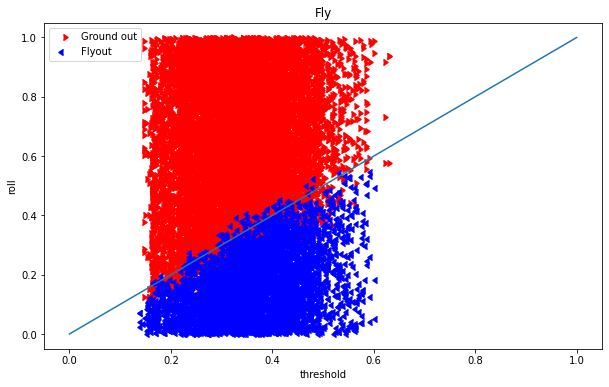

In [49]:
dfc['threshold'] = 0.16-(
     -0.2776083943255873 * dfc['batter_buoyancy_with_vibe']
     -0.10076177945700408 * dfc['ballpark_elongation']
     +0.07782492861928512 * dfc['ballpark_ominousness']
     +0.05186526153248099 * dfc['ballpark_viscosity']
)

x_val = "threshold"
# x_val = "svc_best"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="Ground out", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Flyout", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Fly")
# ax.set_xlim(0.484, 0.499)

ax.plot((0, 1), (0, 1))

ax.legend()

,offset,event_type,home_score,away_score,top_of_inning,inning,pitcher_multiplier,batter_multiplier,baserunner_count,event_type,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
19217,0.058207,Flyout,4.0,1.0,True,8,1.0,1.0,[],Flyout,...,0.957374,Swamuel Mora,Jayden Wright,NaN,NaN,NaN,BASE_INSTINCTS,7,d9ec7300-07eb-4a56-8565-b1b147864cb1,285
25816,0.055141,Flyout,0.7,3.0,True,6,1.0,1.0,['32810dca-825c-4dbc-8b65-0702794c424e'],Flyout,...,0.077669,Beasley Day,Adalberto Tosser,NaN,WILD;CREDIT_TO_THE_TEAM,AFFINITY_FOR_CROWS,CARCINIZATION;UNHOLEY,22,5aee3e80-6285-457d-aa81-32fd4c637a56,270
19282,0.044803,Flyout,8.0,11.0,False,8,1.0,1.0,[],Flyout,...,0.801767,Patel Beyonce,Magi Ruiz,HONEY_ROASTED,NaN,NaN,NaN,7,3395f4ee-baed-4917-a2e6-317bb5b0c38e,384
12590,0.044115,Flyout,0.0,2.0,True,1,1.0,1.0,[],Flyout,...,1.217436,Baby Doyle,Rigby Friedrich,PERK,NaN,EARLBIRDS,UNDERSEA,40,653b1920-117f-4208-b726-63b6cd35b096,36
15193,0.040791,Flyout,4.0,8.0,False,5,1.0,1.0,['ab36c776-b520-429b-a85f-bf633d7b081a'],Flyout,...,0.957374,Swamuel Mora,Edric Tosser,NaN,ALTERNATE,NaN,EARLBIRDS,45,ee35dc73-df73-44a1-ad47-f550761c2157,276
9123,0.037766,Flyout,1.0,0.0,False,3,1.0,1.0,[],Flyout,...,0.957374,Swamuel Mora,Sixpack Santiago,NaN,NaN,NaN,LIFE_OF_PARTY;ELECTRIC,32,41a87540-329f-4e7e-acc6-334163cb5927,111
25992,0.037753,Flyout,0.0,3.0,True,1,1.0,1.0,"['da0bbbe6-d13c-40cc-9594-8c476975d93d', 'dd60...",Flyout,...,0.077669,Beasley Day,Finn James,NaN,WILD,AFFINITY_FOR_CROWS,CARCINIZATION;UNHOLEY,23,6e2784e8-e253-4c0e-9c42-76846768bcd6,66
20780,0.036947,Flyout,0.0,0.0,False,1,1.0,1.0,[],Flyout,...,0.797885,Cannonball Sports,Sosa Hayes,NaN,NaN,LIFE_OF_PARTY;ELECTRIC,NaN,11,334b20a3-dd52-48cf-9957-736d73c1b5d5,58
6619,0.036441,Flyout,1.0,1.0,True,3,1.0,1.0,[],Flyout,...,1.217436,Baby Doyle,Famous Owens,PERK,NaN,EARLBIRDS;PARTY_TIME,FIREPROOF;SEALANT;AMBUSH,95,982194f0-c8ff-4b4d-99b6-b8cf83a73090,113
15686,0.036238,Flyout,4.0,4.0,False,12,1.0,1.0,[],Flyout,...,0.957374,Swamuel Mora,Walton Sports,NaN,FRIEND_OF_CROWS,NaN,EARLBIRDS,46,632c35ca-708a-409b-9d31-3bc3fc2c3469,461


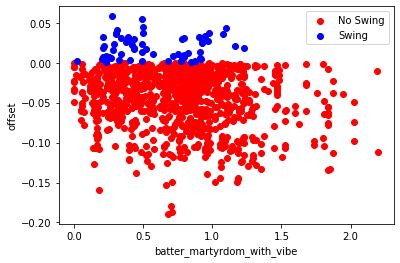

In [38]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "batter_martyrdom_with_vibe"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
table[["offset", "event_type", "home_score", "away_score", "top_of_inning", "inning",
       "pitcher_multiplier", "batter_multiplier", "baserunner_count", "event_type",
       "roll", "threshold", "batter_vibes", "pitcher_vibes",
       "pitcher_ruthlessness", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False).iloc[:20]
# len(table)

In [39]:
dfc.corr()['offset'].sort_values()

passed                       -0.768713
threshold                    -0.282994
batter_buoyancy_with_vibe    -0.281305
batter_buoyancy              -0.275189
batter_martyrdom_with_vibe   -0.104726
                                ...   
batter_multiplier                  NaN
pitcher_multiplier                 NaN
batting_team_hype                  NaN
pitching_team_hype                 NaN
season                             NaN
Name: offset, Length: 156, dtype: float64

In [50]:
X = dfc[['roll', 'passed',
         'batter_buoyancy_with_vibe',
         'batter_martyrdom_with_vibe',
 'defense_avg_anticapitalism',
 'defense_avg_chasiness',
 'defense_avg_omniscience',
 'defense_avg_tenaciousness',
 'defense_avg_watchfulness',
 'defense_avg_anticapitalism_times_vibe',
 'defense_avg_chasiness_times_vibe',
 'defense_avg_omniscience_times_vibe',
 'defense_avg_tenaciousness_times_vibe',
 'defense_avg_watchfulness_times_vibe',
 'defender_vibes',
 'ballpark_grandiosity',
 'ballpark_fortification',
 'ballpark_obtuseness',
 'ballpark_ominousness',
 'ballpark_inconvenience',
 'ballpark_viscosity',
 'ballpark_forwardness',
 'ballpark_mysticism',
 'ballpark_elongation',
 # 'ballpark_filthiness',
        ]]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(intercept_scaling=100, dual=False, max_iter=100000, C=1000, class_weight='balanced').fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[10893   575]
 [  150  4585]]
              precision    recall  f1-score   support

       False       0.99      0.95      0.97     11468
        True       0.89      0.97      0.93      4735

    accuracy                           0.96     16203
   macro avg       0.94      0.96      0.95     16203
weighted avg       0.96      0.96      0.96     16203



In [52]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (-0.27759052336258155, 'batter_buoyancy_with_vibe'),
 (-0.10059661058752327, 'ballpark_elongation'),
 (0.07761471099515348, 'ballpark_ominousness'),
 (0.051870599875402545, 'ballpark_viscosity'),
 (-0.0386816510581093, 'ballpark_grandiosity'),
 (0.036320550334370295, 'ballpark_mysticism'),
 (0.030200527709037923, 'batter_martyrdom_with_vibe'),
 (0.028766324968727507, 'defense_avg_tenaciousness_times_vibe'),
 (-0.026818428095180258, 'ballpark_forwardness'),
 (0.016971118431130656, 'ballpark_obtuseness'),
 (0.015541557810968058, 'ballpark_fortification'),
 (-0.013465691042454563, 'defense_avg_watchfulness_times_vibe'),
 (-0.009176804850206577, 'defense_avg_chasiness_times_vibe'),
 (0.007535530890781748, 'defense_avg_tenaciousness'),
 (-0.007425551354484253, 'defense_avg_chasiness'),
 (0.006094817377431159, 'defense_avg_anticapitalism'),
 (-0.0052725084222371805, 'defense_avg_watchfulness'),
 (-0.001827947076849089, 'defender_vibes'),
 (0.0016350291007666364, 'defense_avg

In [53]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.1542554])

In [44]:
df.sort_values('pitcher_ruthlessness')[['pitcher_name', 'pitcher_ruthlessness', 'pitcher_multiplier']]

,pitcher_name,pitcher_ruthlessness,pitcher_multiplier
9702,Flattery McKinley,0.060292,1.00
21796,Flattery McKinley,0.060292,1.00
16314,Flattery McKinley,0.060292,1.00
1212,Flattery McKinley,0.060292,1.00
3494,Flattery McKinley,0.060292,1.00
...,...,...,...
4024,PolkaDot Patterson,1.695776,1.25
22313,PolkaDot Patterson,1.695776,1.25
26549,PolkaDot Patterson,1.695776,1.25
22047,PolkaDot Patterson,1.695776,1.25


In [45]:
dfc[dfc['pitcher_ruthlessness'] > 1.6]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,defense_avg_anticapitalism_times_vibe,defense_avg_chasiness_times_vibe,defense_avg_omniscience_times_vibe,defense_avg_tenaciousness_times_vibe,defense_avg_watchfulness_times_vibe,threshold,offset


In [46]:
outliers = dfc[~dfc['passed'] & (dfc['roll'] < 0.1)]
outliers

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,defense_avg_anticapitalism_times_vibe,defense_avg_chasiness_times_vibe,defense_avg_omniscience_times_vibe,defense_avg_tenaciousness_times_vibe,defense_avg_watchfulness_times_vibe,threshold,offset
37,37,GroundOut,0.081488,False,0.187435,0.666219,0.372888,0.271983,0.881153,0.071088,...,0.762264,0.619136,1.159404,-0.307749,-0.302796,-0.419708,-0.398628,-0.235893,0.219450,-0.137963
16384,8676,GroundOut,0.093713,False,0.035569,0.379038,0.613316,0.933457,0.437641,0.486944,...,0.871773,0.943603,1.458344,0.482207,0.280958,0.237404,0.182563,0.219415,0.170962,-0.077249
23211,4695,GroundOut,0.082404,False,0.041451,0.342645,0.765675,0.633153,0.602360,0.652489,...,0.514536,0.010153,0.340371,-0.243014,-0.262874,-0.148936,-0.327766,-0.301756,0.164606,-0.082202
24554,6038,GroundOut,0.092777,False,0.075741,0.844856,0.076972,0.700094,0.426765,0.055788,...,0.945179,0.232650,0.412353,0.014139,0.004327,0.011064,0.004879,0.008527,0.171320,-0.078543


In [47]:
df[df['batter_thwackability'] + df['batter_musclitude'] + df['batter_divinity'] < df['batter_patheticism']]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,pitcher_omniscience_with_vibe,pitcher_tenaciousness_with_vibe,pitcher_watchfulness_with_vibe,pitcher_pressurization_with_vibe,pitcher_cinnamon_with_vibe,defense_avg_anticapitalism_times_vibe,defense_avg_chasiness_times_vibe,defense_avg_omniscience_times_vibe,defense_avg_tenaciousness_times_vibe,defense_avg_watchfulness_times_vibe
77,77,GroundOut,0.403257,False,0.061816,0.227117,0.823653,0.642591,0.409381,0.885892,...,0.229531,0.869597,0.236332,0.881937,0.572946,0.078584,0.115151,0.135633,0.129053,0.018701
154,154,GroundOut,0.595310,False,0.517663,0.169405,0.227826,0.721262,0.442868,0.926662,...,0.650169,0.593998,0.536876,0.513278,0.686404,0.115438,0.325610,0.130636,0.174656,0.106865
174,174,GroundOut,0.831815,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,1.022254,0.344173,0.883303,0.938761,0.198590,0.280741,0.065319,0.357404,0.043819,0.206046
226,226,GroundOut,0.387055,False,0.061816,0.227117,0.823653,0.642591,0.409381,0.885892,...,0.229531,0.869597,0.236332,0.881937,0.572946,-0.014231,-0.011545,-0.009529,-0.003375,-0.003100
397,397,GroundOut,0.896727,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.577149,0.193051,0.548654,0.517091,0.617293,0.317638,0.082731,0.091719,0.240504,0.160731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24720,6204,GroundOut,0.253091,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.538752,0.677596,0.711471,0.450230,1.004626,-0.120881,-0.110744,-0.287429,-0.157440,-0.027393
25461,6945,GroundOut,0.779110,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,1.114588,1.125459,0.761898,0.799922,0.409911,-0.065887,-0.024109,-0.097981,-0.043592,-0.080952
25977,7461,GroundOut,0.894198,False,0.060106,0.220833,0.800862,0.624811,0.398054,0.861380,...,0.827556,0.290129,0.481066,0.677277,0.189118,0.878516,1.289794,0.420472,0.714739,0.612098
26386,7870,GroundOut,0.870324,False,0.407004,0.136416,0.070000,0.637947,0.196717,0.930000,...,0.978610,0.985521,0.557328,0.910792,0.877755,-0.152704,-0.139898,-0.363098,-0.198887,-0.034604


In [48]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn